# Biomolecular modeling laboratory


In [1]:
import numpy as np
import pandas as pd
from scipy.signal import correlate


In [2]:

reference_sequence = 'KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL'
reference_sequence[71]


'S'

In [5]:
def get_frequencies(filename: str):
    """
    This function parses the input file that contains BLAST sequences and returns two lists. The first one contains
    the most frequent amino acid at every position, the second one contains their frequency at every position.


    For
    :param filename: must be a vaild path to the file that stores the result of the query done at:
                    https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome
    :return:
    """
    alignments = open(filename)
    lines = alignments.readlines()
    n_lines = len(lines)

    sequences = []

    for idx, line in enumerate(lines):
        if line.startswith('>'):
            current_sequence = ""
            i = 1
            while (idx + i) < n_lines and not lines[idx + i].startswith('>'):  # continua fino alla prossima '>'
                current_sequence += lines[idx + i].strip()  # rimuove newline
                i += 1
            sequences.append(current_sequence)


    number_of_sequences = len(sequences)
    print(f'Found {number_of_sequences} aligned sequences')


    lengths = []
    for sequence in sequences:
        lengths.append(len(sequence))


    most_common = []
    frequencies = []
    for position in range(129):
        amminoacids = []
        for sequence in sequences:
            # we need to count the number of the same amino acids: if a sequence
            if position < len(sequence):
                amminoacids.append(sequence[position])
            else:
                amminoacids.append(str('no amminoacid here'))

        unique, counts = np.unique(amminoacids, return_counts=True)
        frequencies.append(np.max(counts) / number_of_sequences)
        most_common_idx = np.argmax(counts)
        most_common.append(unique[most_common_idx])


    return  most_common, frequencies

In [ ]:
# my idea here is to add to this dataframe also the result we got from other methods like 
# RMSF analysis, 



most_common, frequencies = get_frequencies('data/seqdump_500.txt')
positions = range(129)

our_sequence = []
difference = []
for idx, elem in enumerate(reference_sequence):
    our_sequence.append(elem)
    difference.append(elem == most_common[idx])

# our protein is equal to our reference amminoacid

df = pd.DataFrame({
    'positions': positions,
    '2LYZ_sequence': our_sequence, 
    'most_common_amminoacid': most_common,
    'frequency': frequencies   
})

df
df.to_csv('data/frequencies_500.csv')


most_common = df["most_common_amminoacid"].to_list()
most_common = ''.join(most_common)
print(most_common)
# putting a z where we have NO AMMINOACID HERE



Found 500 aligned sequences
KVFERCELARALKRLGLDGYRGYSLANWVCLAKWESNYNTQATNYNTDGSSTDYGIQQINSWWWCNDGKTPSANNACIICCSLLLSDDITQAVCCAKRVVDDPGGIAAWVAWRNCCQNDDLSWYRGGCno amminoacid here


In [13]:
rmsf_df = pd.read_csv('../automatedSimulation/log/rmsf.dat')
df["rmsf"] = rmsf_df["rmsf"]


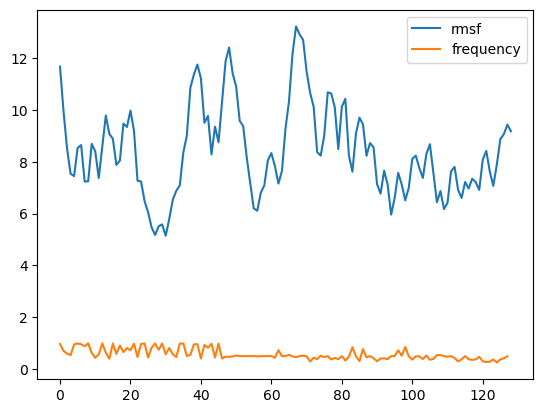

In [14]:
import matplotlib.pyplot as plt

validRows = df["most_common_amminoacid"]!='no amminoacid here'

plt.plot(df["positions"], df["rmsf"])
plt.plot(df[validRows]["positions"], df[validRows]["frequency"])
plt.legend(['rmsf', 'frequency'])
plt.show()

In [15]:
position2Change = np.argmin(frequencies)
print(f'The position that most of often changes in similar protein is: {position2Change} (remember we start counting at zero in python!)')
print(f'At such position we have a { reference_sequence[position2Change] } amino acid')
print(f'In that position the most common amino acid is { most_common[position2Change] }')


The position that most of often changes in similar protein is: 124 (remember we start counting at zero in python!)
At such position we have a R amino acid
In that position the most common amino acid is R


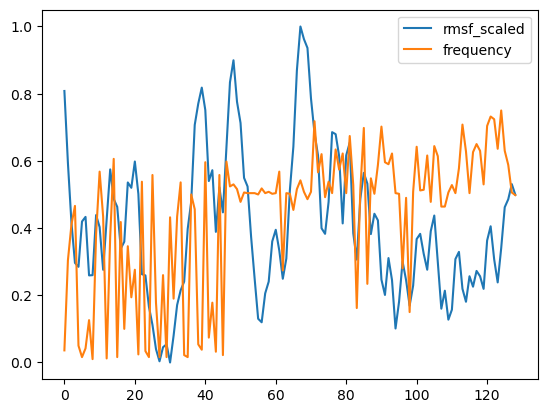

Maximum point of cross_correlation: 63
Maximum point of rmsf: 67
Maximum point of frequencies: 124]


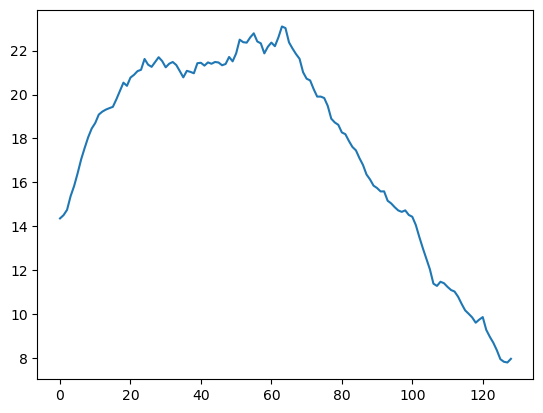

In [ ]:
from sklearn.preprocessing import MinMaxScaler

rmsf = np.array(df["rmsf"]).reshape(-1, 1)
scaler = MinMaxScaler()
rmsf_scaled = scaler.fit_transform(rmsf).flatten()  

for idx,  frequency in enumerate(df["frequency"]):
    frequencies[idx] = 1 - frequency


validRows = df["most_common_amminoacid"]!='no amminoacid here'

plt.plot(df["positions"], rmsf_scaled)
plt.plot(df["positions"], frequencies)
plt.legend(['rmsf_scaled', 'frequency'])
plt.show()



cross_corr = correlate(rmsf_scaled, frequencies, mode='same')

print(f'Maximum point of cross_correlation: {np.argmax(cross_corr)}')
print(f'Maximum point of rmsf: {np.argmax(rmsf_scaled)}')
print(f'Maximum point of frequencies: {np.argmax(frequencies)}]')

plt.plot(df["positions"], cross_corr)





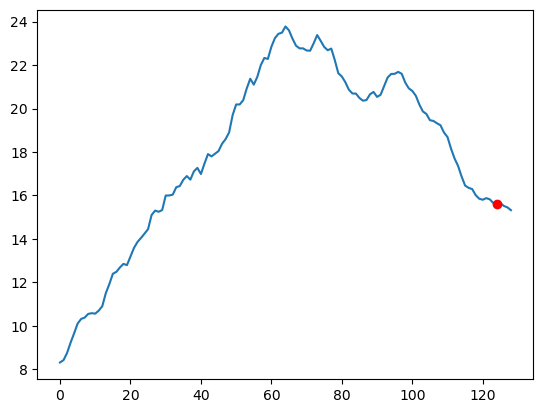

Maximum point of convolution: 64
Maximum point of rmsf: 67
Maximum point of frequencies: 124]
The most common amminoacid at postion 124 is R


In [17]:
convolution = np.convolve(rmsf_scaled, frequencies, mode='same')

plt.plot(range(len(convolution)), convolution)
plt.plot(np.argmax(frequencies), convolution[np.argmax(frequencies)], 'ro')
plt.show()

print(f'Maximum point of convolution: {np.argmax(convolution)}')
print(f'Maximum point of rmsf: {np.argmax(rmsf_scaled)}')
print(f'Maximum point of frequencies: {np.argmax(frequencies)}]')

print(f'The most common amminoacid at postion {np.argmax(frequencies)} is {most_common[np.argmax(frequencies)]}')


